# Exploratory data analysis
## Group project
### 42180 Quantitative modelling of behaviour

------

**Group 11** <br>

------

Camille Babin <br>
Martine Grangé <br>
Mikkel Johansen <br>
Kyriakos Michailidis <br>
Jiri Spitzer

------

Import libraries and enable inline plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from collections import Counter
from re import search as Search
from IPython.display import display

In [2]:
%matplotlib inline

Disable warnings

In [3]:
warnings.filterwarnings('ignore')

Load data

In [4]:
data_path = r'.\data\Elisa_thesis_data_noPC.csv'

In [5]:
df = pd.read_csv(data_path)
df.head(2)

,VAR1,ID,CHOICE,Alt_Description_ICV1,CarClass_ICV1,CarType_ICV1,Purchaseprice_ICV1,Operationcost_ICV1,Yearlycost__ICV1,Range_ICV1,...,q16_20_resp,q16_21_resp,q16_22_resp,q16_23_resp,q16_24_resp,House_single,House_couple,House_children,House_couple_children,House_couple_nochildren
0,0,1,1,1,2,1,200000,1.11,4300,1097,...,1,5,4,2,5,1,0,0,0,0
1,1,1,3,1,2,1,185000,0.88,4300,898,...,1,5,4,2,5,1,0,0,0,0


#### Explore data

Size of the dataset

In [6]:
print("Row count:     ", df.shape[0]) 
print("Column count:  ", df.shape[1])

Row count:      23688
Column count:   428


In [7]:
sorted(df.CHOICE.unique())

[0, 1, 2, 3, 4, 5, 6]

In [8]:
ic_p = round(df[df.CHOICE == 0].VAR1.count() * 100. / df.ID.count(),2)
ic_p18 = round(df[df.CHOICE18 == 0].VAR1.count() * 100. / df.ID.count(),2)
print('Invalid choice:    ',df[df.CHOICE == 0].VAR1.count(),f'({ic_p}%)')
print('Invalid choice 18: ',df[df.CHOICE18 == 0].VAR1.count(),f'({ic_p18}%)')

Invalid choice:     14 (0.06%)
Invalid choice 18:  14 (0.06%)


Check for missing values

In [9]:
stat = []
for col in df.columns: 
    a = list(zip(Counter(df[col].isnull()).keys(), Counter(df[col].isnull()).values()))
    try:
        if (a[0][0] == True):
            stat.append([col, a[0][1]])
        elif (a[1][0] == True):
            stat.append([col, a[1][1]])
    except:
        stat.append([col, 0])
df_stat = pd.DataFrame(stat).rename(columns={0:'Column name',1:'N/A count'})
df_stat = df_stat.sort_values(by=["N/A count"], ascending=False)
df_stat["N/A %"] = round(df_stat["N/A count"] / len(df) * 100,2)
df_stat.head(5)

,Column name,N/A count,N/A %
0,VAR1,0,0.0
294,q2a_2_carClass,0,0.0
292,q2,0,0.0
291,q1,0,0.0
290,c_Geogrp,0,0.0


Slect specific columns

In [10]:
col = df.columns.to_list()

pattern = [
    "Purchaseprice_", "cost_", "cost_", "CO2_", "Charging",
    "Range", "Acceleration", "Home", "Size", "CarClass","CarType"
]
col_s = []
for c in col:
    for p in pattern:
        if Search(p,c):
            col_s.append(c)
            break
            
print(col_s)
print(len(col_s))

['CarClass_ICV1', 'CarType_ICV1', 'Purchaseprice_ICV1', 'Operationcost_ICV1', 'Yearlycost__ICV1', 'Range_ICV1', 'Acceleration_ICV1', 'Size_ICV1', 'CO2_ICV1', 'Charginginfrastructure_ICV1', 'Chargingspeed_ICV1', 'Homedistnearestcharger_ICV1', 'Homechargeravailability_ICV1', 'CarClass_ICV2', 'CarType_ICV2', 'Purchaseprice_ICV2', 'Operationcost_ICV2', 'Yearlycost__ICV2', 'Range_ICV2', 'Acceleration_ICV2', 'Size_ICV2', 'CO2_ICV2', 'Charginginfrastructure_ICV2', 'Chargingspeed_ICV2', 'Homedistnearestcharger_ICV2', 'Homechargeravailability_ICV2', 'CarClass_BEV1', 'CarType_BEV1', 'Purchaseprice_BEV1', 'Operationcost_BEV1', 'Yearlycost__BEV1', 'Range_BEV1', 'Acceleration_BEV1', 'Size_BEV1', 'CO2_BEV1', 'Charginginfrastructure_BEV1', 'Chargingspeed_BEV1', 'Homedistnearestcharger_BEV1', 'Homechargeravailability_BEV1', 'CarClass_BEV2', 'CarType_BEV2', 'Purchaseprice_BEV2', 'Operationcost_BEV2', 'Yearlycost__BEV2', 'Range_BEV2', 'Acceleration_BEV2', 'Size_BEV2', 'CO2_BEV2', 'Charginginfrastructure

In [11]:
df2 = df.copy(deep=True)
df2 = df2[col_s]

In [12]:
# pd.options.display.max_columns = None

Basic descriptive statistics

In [13]:
col = df2.columns.to_list()
cat = ["ICV1","ICV2","BEV1","BEV2","PHEV1","PHEV2"]
col_s = []
for x in cat:
    for c in col:
        if Search(x,c):
            col_s.append(c)
    display(df2[col_s].describe().T)
    col_s.clear()

,count,mean,std,min,25%,50%,75%,max
CarClass_ICV1,23688.0,3.047957,1.201481,0.0,2.0,3.00,4.00,6.00
CarType_ICV1,23688.0,0.999831,0.012994,0.0,1.0,1.00,1.00,1.00
Purchaseprice_ICV1,23688.0,323610.266802,220567.341857,0.0,185000.0,287500.00,430000.00,1600000.00
Operationcost_ICV1,23688.0,1.130534,0.181739,0.0,1.0,1.11,1.25,1.93
Yearlycost__ICV1,23688.0,6736.854483,2481.578004,0.0,4783.0,5978.00,8175.00,13979.00
Range_ICV1,23688.0,919.529762,132.460081,0.0,735.0,898.00,997.00,1097.00
Acceleration_ICV1,23688.0,12.110098,2.610474,0.0,10.0,12.00,14.00,16.00
Size_ICV1,23688.0,3.698202,1.120197,0.0,3.0,4.00,5.00,5.00
CO2_ICV1,23688.0,132.816700,31.358862,0.0,98.0,138.00,161.00,182.00
Charginginfrastructure_ICV1,23688.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00


,count,mean,std,min,25%,50%,75%,max
CarClass_ICV2,23688.0,3.241641,1.453067,0.0,2.0,3.00,4.0,6.00
CarType_ICV2,23688.0,0.999831,0.012994,0.0,1.0,1.00,1.0,1.00
Purchaseprice_ICV2,23688.0,383798.231172,313519.018843,0.0,185000.0,287500.00,500000.0,1600000.00
Operationcost_ICV2,23688.0,1.158605,0.220002,0.0,1.0,1.12,1.3,1.93
Yearlycost__ICV2,23688.0,7313.257683,2985.761256,0.0,4837.0,5978.00,9992.0,13979.00
Range_ICV2,23688.0,918.363349,132.063295,0.0,812.0,898.00,997.0,1097.00
Acceleration_ICV2,23688.0,11.732692,2.744271,0.0,10.0,12.00,14.0,16.00
Size_ICV2,23688.0,3.739699,1.189713,0.0,3.0,4.00,5.0,5.00
CO2_ICV2,23688.0,133.217958,31.645911,0.0,100.0,138.00,161.0,182.00
Charginginfrastructure_ICV2,23688.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.00


,count,mean,std,min,25%,50%,75%,max
CarClass_BEV1,23688.0,3.047957,1.201481,0.0,2.00,3.00,4.0,6.00
CarType_BEV1,23688.0,1.999662,0.025988,0.0,2.00,2.00,2.0,2.00
Purchaseprice_BEV1,23688.0,326258.654171,216739.064559,0.0,220000.00,275000.00,350000.0,1600000.00
Operationcost_BEV1,23688.0,0.654157,0.100777,0.0,0.56,0.63,0.7,0.99
Yearlycost__BEV1,23688.0,6892.490502,2829.845231,0.0,4997.00,5899.00,7992.0,15827.00
Range_BEV1,23688.0,346.326199,139.625199,0.0,250.00,350.00,450.0,600.00
Acceleration_BEV1,23688.0,8.291540,2.406443,0.0,6.00,9.00,11.0,13.00
Size_BEV1,23688.0,3.698202,1.120197,0.0,3.00,4.00,5.0,5.00
CO2_BEV1,23688.0,28.095027,23.888934,0.0,0.00,18.00,35.0,70.00
Charginginfrastructure_BEV1,23688.0,75.016464,33.548520,0.0,60.00,90.00,120.0,120.00


,count,mean,std,min,25%,50%,75%,max
CarClass_BEV2,23688.0,3.241641,1.453067,0.0,2.00,3.00,4.00,6.00
CarType_BEV2,23688.0,1.999662,0.025988,0.0,2.00,2.00,2.00,2.00
Purchaseprice_BEV2,23688.0,387720.786896,309730.359316,0.0,220000.00,275000.00,500000.00,1600000.00
Operationcost_BEV2,23688.0,0.671540,0.117455,0.0,0.57,0.67,0.75,0.99
Yearlycost__BEV2,23688.0,7646.198582,3494.569196,0.0,4997.00,6107.00,9769.00,15827.00
Range_BEV2,23688.0,346.578647,139.874731,0.0,250.00,350.00,450.00,600.00
Acceleration_BEV2,23688.0,8.196175,2.496313,0.0,6.00,8.00,10.00,13.00
Size_BEV2,23688.0,3.739699,1.189713,0.0,3.00,4.00,5.00,5.00
CO2_BEV2,23688.0,28.133528,23.977143,0.0,0.00,18.00,35.00,70.00
Charginginfrastructure_BEV2,23688.0,75.016464,33.548520,0.0,60.00,90.00,120.00,120.00


,count,mean,std,min,25%,50%,75%,max
CarClass_PHEV1,23688.0,1.524147,1.744766,0.0,0.0,0.500,3.00,6.00
CarType_PHEV1,23688.0,1.500000,1.500032,0.0,0.0,1.500,3.00,3.00
Purchaseprice_PHEV1,23688.0,173029.403073,241356.461612,0.0,0.0,42000.000,287500.00,1600000.00
Operationcost_PHEV1,23688.0,0.552735,0.568053,0.0,0.0,0.375,1.11,1.79
Yearlycost__PHEV1,23688.0,3238.477710,3635.983268,0.0,0.0,1750.000,5636.00,13688.00
Range_PHEV1,23688.0,27.077001,32.397457,0.0,0.0,10.000,50.00,100.00
Acceleration_PHEV1,23688.0,4.149992,4.484307,0.0,0.0,1.500,9.00,13.00
Size_PHEV1,23688.0,1.848869,2.010138,0.0,0.0,1.000,4.00,5.00
CO2_PHEV1,23688.0,61.805851,64.959904,0.0,0.0,35.000,130.00,169.00
Charginginfrastructure_PHEV1,23688.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.00


,count,mean,std,min,25%,50%,75%,max
CarClass_PHEV2,23688.0,1.620905,1.919032,0.0,0.0,0.500,3.00,6.00
CarType_PHEV2,23688.0,1.500000,1.500032,0.0,0.0,1.500,3.00,3.00
Purchaseprice_PHEV2,23688.0,206356.636272,309405.061445,0.0,0.0,42000.000,287500.00,1600000.00
Operationcost_PHEV2,23688.0,0.567303,0.587919,0.0,0.0,0.375,1.11,1.79
Yearlycost__PHEV2,23688.0,3541.474080,4078.440132,0.0,0.0,1750.000,6030.00,13688.00
Range_PHEV2,23688.0,27.611027,33.005286,0.0,0.0,10.000,50.00,100.00
Acceleration_PHEV2,23688.0,4.095745,4.462444,0.0,0.0,1.500,8.00,13.00
Size_PHEV2,23688.0,1.872045,2.052290,0.0,0.0,1.000,4.00,5.00
CO2_PHEV2,23688.0,62.037614,65.298292,0.0,0.0,35.000,130.00,169.00
Charginginfrastructure_PHEV2,23688.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.00


Plot Boxplots

In [14]:
'''
for c in df2:
    df2.boxplot(column = str(c))
    plt.show()
''';

In [15]:
'''
fig, axes = plt.subplots(11, 6, sharex=True, figsize=(18,34))
#fig.suptitle('Boxplots for each continuous variable')

for i,col in enumerate(df2.columns.to_list()):
    x = i // 6
    y = i % 6
    sns.boxplot(ax=axes[x, y], data=df2[col].to_list())
    axes[x, y].set_title(col)
''';

In [17]:
'''
df3 = df2.copy(deep=True)
col_drop = [
    'Charginginfrastructure_ICV1', 'Chargingspeed_ICV1', 'Homedistnearestcharger_ICV1', 'Homechargeravailability_ICV1',
    'Charginginfrastructure_ICV2', 'Chargingspeed_ICV2', 'Homedistnearestcharger_ICV2', 'Homechargeravailability_ICV2',
    'Charginginfrastructure_PHEV1', 'Chargingspeed_PHEV1', 'Charginginfrastructure_PHEV2', 'Chargingspeed_PHEV2'
]
df3 = df3.drop(col_drop, axis = 1) 

fig, axes = plt.subplots(6, 9, sharex=True, figsize=(16,14))

for i,col in enumerate(df3.columns.to_list()):
    x = i // 9
    y = i % 9
    sns.boxplot(ax=axes[x, y], data=df3[col].to_list())
    axes[x, y].set_title(col)
''';

Display choices

In [18]:
df.groupby('CHOICE')['CHOICE'].count()

CHOICE
0      14
1    6694
2    3257
3    6804
4    3125
5    2656
6    1138
Name: CHOICE, dtype: int64

In [19]:
col = df2.columns.to_list()
cat = ["CarClass","CarType"]
col_s = []
for c in col:
    for x in cat:
        if Search(x,c):
            col_s.append(c)
col_s

['CarClass_ICV1',
 'CarType_ICV1',
 'CarClass_ICV2',
 'CarType_ICV2',
 'CarClass_BEV1',
 'CarType_BEV1',
 'CarClass_BEV2',
 'CarType_BEV2',
 'CarClass_PHEV1',
 'CarType_PHEV1',
 'CarClass_PHEV2',
 'CarType_PHEV2']

In [20]:
col_s2 = [x for x in col_s]
col_s2.insert(0,"CHOICE")
col_s2.insert(1,"CHOICE18")
col_s2

['CHOICE',
 'CHOICE18',
 'CarClass_ICV1',
 'CarType_ICV1',
 'CarClass_ICV2',
 'CarType_ICV2',
 'CarClass_BEV1',
 'CarType_BEV1',
 'CarClass_BEV2',
 'CarType_BEV2',
 'CarClass_PHEV1',
 'CarType_PHEV1',
 'CarClass_PHEV2',
 'CarType_PHEV2']

In [21]:
df[col_s2]

,CHOICE,CHOICE18,CarClass_ICV1,CarType_ICV1,CarClass_ICV2,CarType_ICV2,CarClass_BEV1,CarType_BEV1,CarClass_BEV2,CarType_BEV2,CarClass_PHEV1,CarType_PHEV1,CarClass_PHEV2,CarType_PHEV2
0,1,2,2,1,4,1,2,2,4,2,0,0,0,0
1,3,8,2,1,4,1,2,2,4,2,0,0,0,0
2,1,2,2,1,4,1,2,2,4,2,0,0,0,0
3,1,2,2,1,4,1,2,2,4,2,0,0,0,0
4,5,14,2,1,4,1,2,2,4,2,2,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,4,9,2,1,3,1,2,2,3,2,0,0,0,0
23684,4,9,2,1,3,1,2,2,3,2,2,3,3,3
23685,4,9,2,1,3,1,2,2,3,2,2,3,3,3
23686,4,9,2,1,3,1,2,2,3,2,2,3,3,3


In [22]:
for c in col_s:
    print(c,sorted(df2[c].unique()))

CarClass_ICV1 [0, 1, 2, 3, 4, 5, 6]
CarType_ICV1 [0, 1]
CarClass_ICV2 [0, 1, 2, 3, 4, 5, 6]
CarType_ICV2 [0, 1]
CarClass_BEV1 [0, 1, 2, 3, 4, 5, 6]
CarType_BEV1 [0, 2]
CarClass_BEV2 [0, 1, 2, 3, 4, 5, 6]
CarType_BEV2 [0, 2]
CarClass_PHEV1 [0, 1, 2, 3, 4, 5, 6]
CarType_PHEV1 [0, 3]
CarClass_PHEV2 [0, 1, 2, 3, 4, 5, 6]
CarType_PHEV2 [0, 3]


In [23]:
choice = [x for x in range(0,7)]
choice_cnt = df.groupby('CHOICE')['CHOICE'].count().to_list()
choice_prc = [round(x * 100. / sum(choice_cnt),4) for x in choice_cnt]

choice_stat = pd.DataFrame(
    {
        "choice": choice,
        "count": choice_cnt,
        "ratio": choice_prc
    }
)

choice_stat.sort_values(by=['count'], ascending=False)

,choice,count,ratio
3,3,6804,28.7234
1,1,6694,28.2590
2,2,3257,13.7496
4,4,3125,13.1923
5,5,2656,11.2124
6,6,1138,4.8041
0,0,14,0.0591


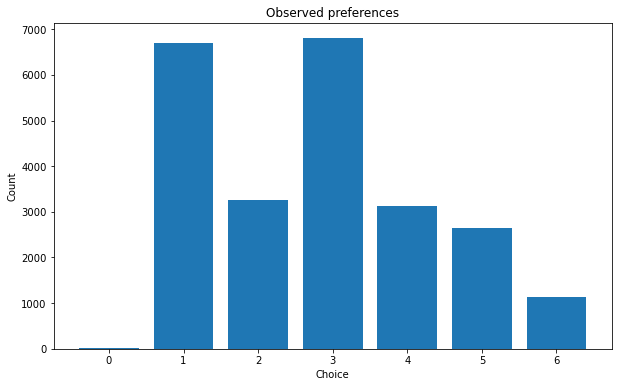

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(choice_stat["choice"].to_list(),choice_stat["count"].to_list())
plt.title('Observed preferences')
plt.xlabel('Choice')
plt.ylabel('Count')
#plt.grid(True)
# plt.show()
plt.savefig(r'C:\Users\Jirka\Desktop\choices.png')

Demographic data

In [25]:
df4 = df.copy(deep=True)
check_sum =len(df4)

In [26]:
print("Min. age:",df4.c_Age.min())
print("Max. age:",df4.c_Age.max())

Min. age: 18
Max. age: 90


In [27]:
df4 = df4.drop_duplicates(subset=["ID"])

Check sum

In [28]:
int(check_sum / 4) == int(len(df4))

False

In [29]:
df4['c_Age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 90], dtype=int64)

In [30]:
df4['age_group'] = -1
df4['age_group'] = np.where(df4['c_Age'] <= 30,1,df4['age_group'])
df4['age_group'] = np.where((df4['c_Age'] > 30) & (df4['c_Age'] <= 40),2,df4['age_group'])
df4['age_group'] = np.where((df4['c_Age'] > 40) & (df4['c_Age'] <= 55),3,df4['age_group'])
df4['age_group'] = np.where((df4['c_Age'] > 55) & (df4['c_Age'] <= 75),4,df4['age_group'])
df4['age_group'] = np.where(df4['c_Age'] > 75,5,df4['age_group'])

In [31]:
print("Check age_group:",df4[df4['age_group'] == -1]['ID'].count())

Check age_group: 0


In [32]:
age_group = [x for x in range(1,6)]
age_cnt = df4.groupby('age_group')['age_group'].count().to_list()
age_prc = [round(x * 100. / sum(age_cnt),4) for x in age_cnt]

age_stat = pd.DataFrame(
    {
        "age_group": age_group,
        "count": age_cnt,
        "ratio": age_prc
    }
)

age_stat.sort_values(by=['count'], ascending=False)

,age_group,count,ratio
2,3,974,32.8943
3,4,964,32.5566
1,2,465,15.7042
0,1,449,15.1638
4,5,109,3.6812


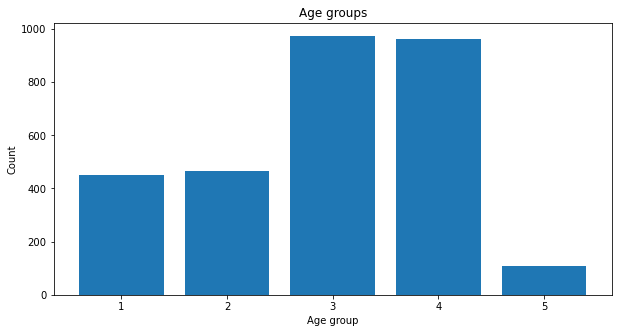

In [33]:
plt.figure(figsize=(10, 5))
plt.bar(age_stat["age_group"].to_list(),age_stat["count"].to_list())
plt.title('Age groups')
plt.xlabel('Age group')
plt.ylabel('Count')
#plt.grid(True)
#plt.show()
plt.savefig(r'C:\Users\Jirka\Desktop\age_groups.png')

In [34]:
#df4.groupby('c_Gender')['c_Gender'].count().plot(kind='pie', y='Gender');

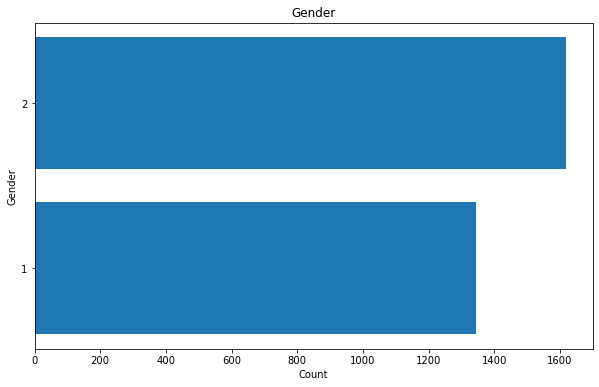

In [35]:
plt.figure(figsize=(10, 6))
plt.barh([1,2],df4.groupby('c_Gender')['c_Gender'].count().to_list())
plt.title('Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.yticks([1,2])
#plt.show()
plt.savefig(r'C:\Users\Jirka\Desktop\gender.png')

In [36]:
df_mod=df[df['CHOICE']>0].copy(deep=True)
df_mod.reset_index();

In [37]:
n,m=df_mod.shape

In [38]:
av_cho=[]
for i in df_mod.index:
    av_cho.append([])
    if df_mod['CarClass_ICV1'].loc[i]>0: 
        av_cho[-1].append(df_mod['CarClass_ICV1'].loc[i])
    if df_mod['CarClass_ICV2'].loc[i]>0:
        av_cho[-1].append(df_mod['CarClass_ICV2'].loc[i])
    if df_mod['CarClass_BEV1'].loc[i]>0:
        av_cho[-1].append(df_mod['CarClass_BEV1'].loc[i]+6)
    if df_mod['CarClass_BEV2'].loc[i]>0:
        av_cho[-1].append(df_mod['CarClass_BEV2'].loc[i]+6)
    if df_mod['CarClass_PHEV1'].loc[i]>0: 
        av_cho[-1].append(df_mod['CarClass_PHEV1'].loc[i]+12)
    if df_mod['CarClass_PHEV2'].loc[i]>0:

        av_cho[-1].append(df_mod['CarClass_PHEV2'].loc[i]+12)

In [39]:
avail=[f'AV{x}' for x in range(1,19)]
for i in range(18):
    df_mod[avail[i]]=np.zeros(n,int)
    for j in range(n):
        if i+1 in av_cho[j]:
            df_mod[avail[i]].loc[df_mod.index[j]]=1

In [40]:
pd.options.display.max_columns = 30

In [69]:
cols = ['CHOICE','CHOICE18']
cols += avail
df_ch = df_mod[cols].copy(deep=True)
df_ch.head(2)

,CHOICE,CHOICE18,AV1,AV2,AV3,AV4,AV5,AV6,AV7,AV8,AV9,AV10,AV11,AV12,AV13,AV14,AV15,AV16,AV17,AV18
0,1,2,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,3,8,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [42]:
pd.DataFrame(df_ch[avail].sum()).transpose()

,AV1,AV2,AV3,AV4,AV5,AV6,AV7,AV8,AV9,AV10,AV11,AV12,AV13,AV14,AV15,AV16,AV17,AV18
0,5660,9784,13910,10586,4824,2584,5660,9784,13910,10586,4824,2584,2832,4892,6953,5293,2412,1292


In [ ]:
"""
options = [x for x in range(1,19)]

plt.figure(figsize=(10, 6))
plt.bar(options,df_ch[avail].sum().to_list())
plt.title('Availability')
plt.xlabel('Option')
plt.ylabel('Count')
plt.xticks(options)
#plt.show()
plt.savefig(r'C:\Users\Jirka\Desktop\availability.png')
""";

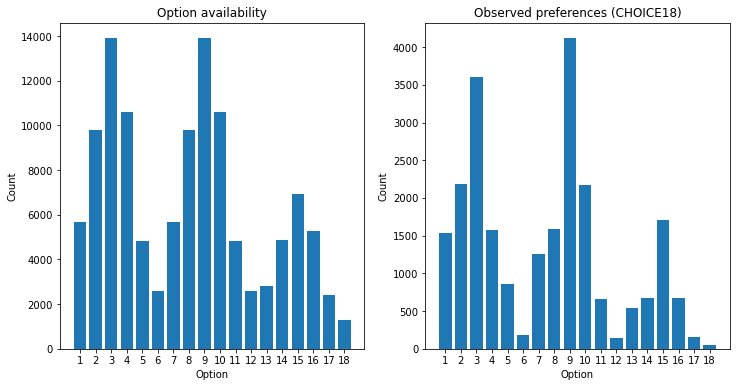

In [44]:
options = [x for x in range(1,19)]

fig, (sp1,sp2) = plt.subplots(1, 2,figsize=(12,6))

plt.setp((sp1,sp2),xticks=options) #, xticklabels=['a', 'b', 'c']

sp1.bar(options,df_ch[avail].sum().to_list())
sp1.set(xlabel='Option', ylabel='Count', title='Option availability')

sp2.bar(options,df_ch.groupby('CHOICE18')['CHOICE18'].count().to_list())
sp2.set(xlabel='Option', ylabel='Count', title='Observed preferences (CHOICE18)')

fig.savefig(r'C:\Users\Jirka\Desktop\choices18.png')

In [71]:
df_ch2 = pd.DataFrame(df_ch.groupby('CHOICE18')['CHOICE18'].count())
df_ch2.rename(columns={"CHOICE18":"Count"},inplace=True)
df_ch2 = df_ch2.reset_index()
df_ch2['Ratio'] = round(df_ch2['Count'] / df_ch2['Count'].sum() * 100,2)
df_ch2 = df_ch2.set_index('CHOICE18')
df_ch2 = df_ch2.transpose()
df_ch2

CHOICE18,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Count,1538.0,2184.00,3604.00,1574.00,864.00,187.00,1254.0,1583.00,4118.00,2177.0,660.00,137.00,543.00,670.00,1713.00,670.00,150.00,48.0
Ratio,6.5,9.23,15.22,6.65,3.65,0.79,5.3,6.69,17.39,9.2,2.79,0.58,2.29,2.83,7.24,2.83,0.63,0.2
